## 导入模块

Magnetic Declination: -10° 42'  磁偏角

Declination is NEGATIVE (WEST)

Inclination: 61° 58'  地磁倾角

Magnetic field strength: 54997.1 nT

In [1]:
import os
os.getcwd()

'/home/jiajianhao/文档/cnn/my_Magnetic_methods-master'

In [2]:
from Utils.Models import *
from Utils.Densenet import *
# 设置默认字体为黑体
plt.rcParams['font.family'] = ['WenQuanYi Zen Hei']  # 黑体
# 或者设置能够支持中文的其他字体名称
# plt.rcParams['font.family'] = ['SimSun']  # 宋体

# 对于负号显示问题，确保正常显示
plt.rcParams['axes.unicode_minus'] = False


2024-06-08 10:34:11.773148: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## 单个物体及标注可视化

### 球体

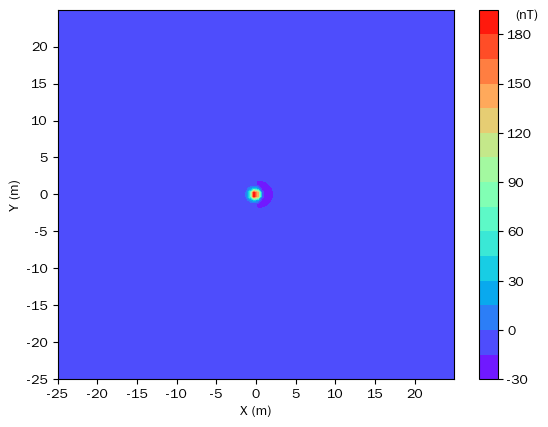

In [10]:
test_diple = Dipole(x=0,y=0,r=0.18,h=1,Latitudes=70,H_capteur_bas=0,h_capteur_haut=1000)
bbox = test_diple.bbox

test_diple.Plot_X_array_raw(cmap='rainbow')


### 椭球

![椭球位置](./imgs/椭球位置参数.jpeg)

假设所有物体都是围绕其旋转轴对称的，因此$\gamma=0$

其中:
$\gamma = gama;\theta = theta; \phi = phi$

只要观测点的距离至少是物体长度的两倍，就认为只有偶极矩会影响观测

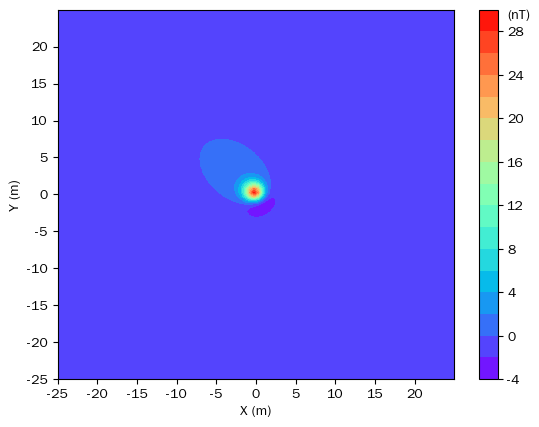

In [11]:
test_elli = Ellipse(x=0,y=0,a=0.18,b=0.09,c =0.09,e=2,h=1.8,theta=60,phi=20,I=70)
test_elli2 = Ellipse(a=0.15)
# test_elli.F = test_elli.F +test_elli2.F
test_elli.Plot_X_array_raw(cmap='rainbow')

In [19]:
print(f'球体异常极值{np.max(test_diple.F)},{np.min(test_diple.F)}')
print(f'椭球异常极值{np.max(test_elli.F)},{np.min(test_elli.F)}')

球体异常极值185.6627612570827,-29.018785594456162
椭球异常极值155.29566494769043,-17.32079373419554


### 圆柱体

## 最多9个物体同图及标注生成

### 全为球体

In [1]:
data_num = 100
noise_num = 100
nummax = 25

In [4]:
parameter, num_of_dipoles, bbox,data = generate_random_muti_dipole(data_num=data_num,nummax=nummax)

In [5]:
data= X_array_reship(data)
map_lenght = 25
zmax = 416
X = np.linspace(-map_lenght, map_lenght, zmax)
Y = np.linspace(-map_lenght, map_lenght, zmax)

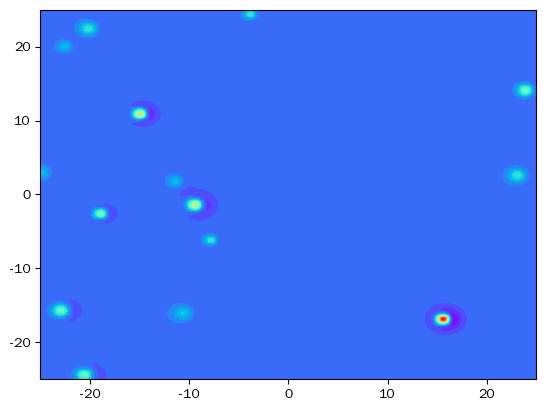

In [6]:
plt.contourf(X,Y,data[2], levels=25, cmap='rainbow')
plt.show()

In [29]:
def Plot_X_data(num_of_dipoles, bbox, datas, map_lenght=25, num=2):

    n_examples = datas.shape[0]
    zmax = datas.shape[1]

    pixel_to_real = ((map_lenght*2)/zmax)
    real_to_pixel = zmax/(map_lenght*2)

    X = np.linspace(-map_lenght, map_lenght, zmax)
    Y = np.linspace(-map_lenght, map_lenght, zmax)

    rows, cols = 1, num
    height_2 = 14
    width_2 = 8
    fig, axs = plt.subplots(rows, cols, figsize=(height_2, width_2))
    # fig.subplots_adjust(hspace = 0, wspace=0)

    axs = axs.ravel()
    examples = np.random.randint(n_examples, size=num)

    for lat_i in range(num):
        rect_real = []
        rect_pixel = []
        example = examples[lat_i]
        for n_ii in range(num_of_dipoles[example]):

            x0, y0, bwidth, bheight = (bbox[example, n_ii]) * real_to_pixel
            rect_pixel.append(Rectangle((x0, y0), bwidth,
                                        bheight, edgecolor='r', facecolor="none"))

            x0_2, y0_2, bwidth_2, bheight_2 = (bbox[example, n_ii])

            print(
                f"Dipole_{n_ii}: x0: {np.round(x0_2,1)}, y0: {np.round(y0_2,1)}, w: {round(bwidth_2,1)}, h:{round(bheight_2,1)}")

            rect_real.append(Rectangle((x0_2, y0_2), bwidth_2,
                                       bheight_2, edgecolor='r', facecolor="none"))

        axs[lat_i].contourf(X, Y, datas[example, :, :],
                            levels=18, cmap='rainbow')
        axs[lat_i].set_xlabel('Position X (m)')
        axs[lat_i].set_ylabel('Position Y (m)')
        axs[lat_i].set_xticks(np.arange(-25, 25, step=2))
        axs[lat_i].set_yticks(np.arange(-25, 25, step=2))
        for n_iii in range(num_of_dipoles[example]):
            axs[lat_i].add_patch(rect_real[n_iii])


    plt.tight_layout()



Dipole_0: x0: 3.8, y0: -11.8, w: 4.7, h:4.0
Dipole_1: x0: 8.6, y0: 4.6, w: 4.7, h:4.0
Dipole_2: x0: -3.0, y0: 8.6, w: 4.7, h:4.0
Dipole_3: x0: -1.8, y0: -2.2, w: 4.7, h:4.0
Dipole_4: x0: 11.0, y0: 15.4, w: 4.7, h:4.1
Dipole_5: x0: -15.4, y0: -7.4, w: 4.7, h:4.0
Dipole_6: x0: -17.0, y0: -12.5, w: 4.7, h:4.0
Dipole_7: x0: 9.8, y0: 10.6, w: 4.7, h:4.0
Dipole_8: x0: 19.0, y0: -22.6, w: 4.7, h:4.1
Dipole_9: x0: 17.0, y0: 12.6, w: 4.7, h:4.0
Dipole_10: x0: -14.2, y0: -25.0, w: 4.7, h:2.9
Dipole_11: x0: 0.6, y0: -0.1, w: 4.7, h:4.0
Dipole_12: x0: -24.2, y0: 2.6, w: 4.7, h:4.0
Dipole_13: x0: -16.2, y0: 20.2, w: 4.7, h:4.1
Dipole_14: x0: -13.8, y0: 0.7, w: 4.7, h:4.0
Dipole_15: x0: 21.4, y0: -1.8, w: 3.6, h:4.0
Dipole_16: x0: -3.8, y0: -4.2, w: 4.7, h:4.0
Dipole_17: x0: 6.6, y0: -19.0, w: 4.7, h:4.1
Dipole_18: x0: -17.8, y0: -23.3, w: 4.7, h:4.1
Dipole_19: x0: -4.2, y0: -25.0, w: 4.7, h:3.3
Dipole_20: x0: -14.6, y0: -22.2, w: 4.7, h:4.1
Dipole_0: x0: 6.2, y0: 21.4, w: 4.7, h:3.6
Dipole_1: x0: -

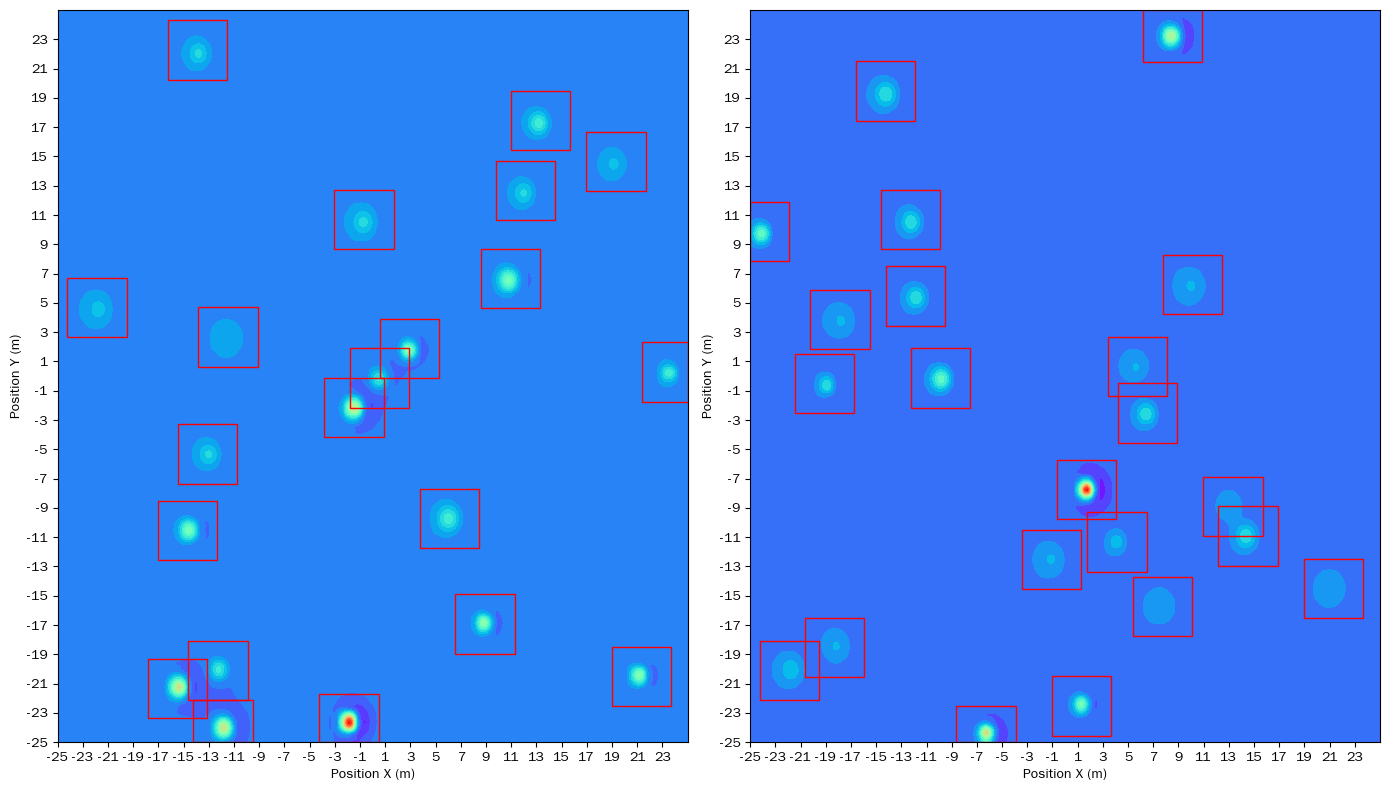

In [30]:
Plot_X_data(num_of_dipoles, bbox, data)

Dipole_0: x0: -25.0, y0: -3.8, w: 3.5, h:4.0
Dipole_1: x0: -3.8, y0: -5.4, w: 4.7, h:4.0
Dipole_2: x0: 1.4, y0: 21.0, w: 4.7, h:3.9
Dipole_3: x0: -14.2, y0: -22.2, w: 4.7, h:4.1
Dipole_4: x0: -9.0, y0: -15.0, w: 4.7, h:4.1
Dipole_5: x0: -15.0, y0: 18.7, w: 4.7, h:4.1
Dipole_6: x0: 14.2, y0: -19.8, w: 4.7, h:4.1
Dipole_7: x0: -25.0, y0: 17.8, w: 3.9, h:4.1
Dipole_8: x0: -21.4, y0: -9.8, w: 4.7, h:4.0
Dipole_9: x0: 22.2, y0: -7.8, w: 2.8, h:4.0
Dipole_10: x0: 11.4, y0: 6.6, w: 4.7, h:4.0
Dipole_11: x0: 21.0, y0: 8.2, w: 4.0, h:4.1
Dipole_12: x0: -23.0, y0: -18.2, w: 4.7, h:4.1
Dipole_13: x0: 15.8, y0: 2.2, w: 4.7, h:4.0
Dipole_14: x0: -12.6, y0: -2.6, w: 4.7, h:4.0
Dipole_15: x0: -19.0, y0: 1.4, w: 4.7, h:4.0
Dipole_16: x0: -6.2, y0: 11.5, w: 4.7, h:4.0
Dipole_17: x0: -25.0, y0: 9.5, w: 3.1, h:4.0
Dipole_18: x0: 19.8, y0: -15.4, w: 4.7, h:4.0
Dipole_19: x0: -12.2, y0: -9.0, w: 4.7, h:4.0
Dipole_20: x0: 21.8, y0: -3.0, w: 3.2, h:4.0
Dipole_0: x0: 1.8, y0: -19.3, w: 4.7, h:4.1
Dipole_1: x0

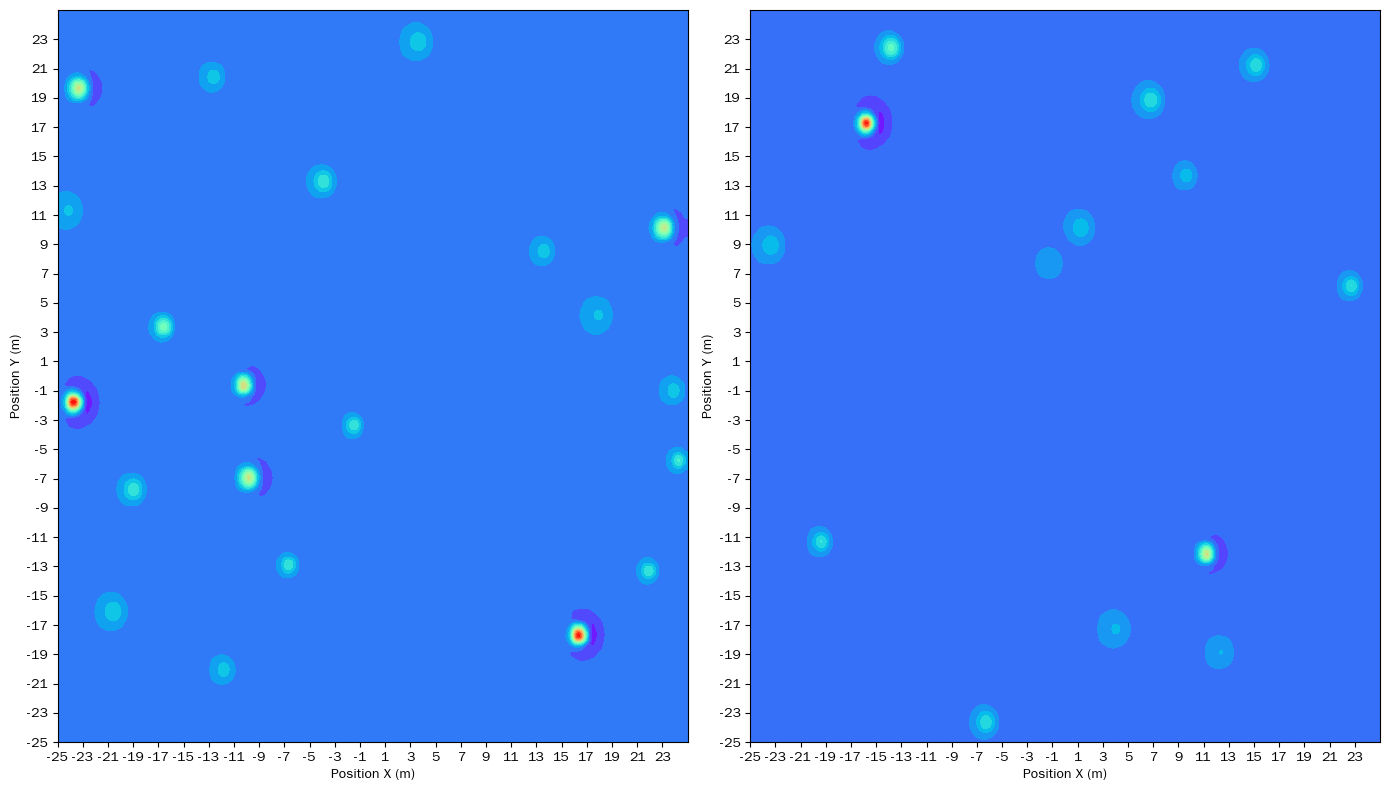

In [32]:
Plot_X_data(num_of_dipoles, bbox, data)

In [31]:
def Plot_X_data(num_of_dipoles, bbox, datas, map_lenght=25, num=2):

    n_examples = datas.shape[0]
    zmax = datas.shape[1]

    pixel_to_real = ((map_lenght*2)/zmax)
    real_to_pixel = zmax/(map_lenght*2)

    X = np.linspace(-map_lenght, map_lenght, zmax)
    Y = np.linspace(-map_lenght, map_lenght, zmax)

    rows, cols = 1, num
    height_2 = 14
    width_2 = 8
    fig, axs = plt.subplots(rows, cols, figsize=(height_2, width_2))
    # fig.subplots_adjust(hspace = 0, wspace=0)

    axs = axs.ravel()
    examples = np.random.randint(n_examples, size=num)

    for lat_i in range(num):
        rect_real = []
        rect_pixel = []
        example = examples[lat_i]
        for n_ii in range(num_of_dipoles[example]):

            x0, y0, bwidth, bheight = (bbox[example, n_ii]) * real_to_pixel
            rect_pixel.append(Rectangle((x0, y0), bwidth,
                                        bheight, edgecolor='r', facecolor="none"))

            x0_2, y0_2, bwidth_2, bheight_2 = (bbox[example, n_ii])

            print(
                f"Dipole_{n_ii}: x0: {np.round(x0_2,1)}, y0: {np.round(y0_2,1)}, w: {round(bwidth_2,1)}, h:{round(bheight_2,1)}")

            rect_real.append(Rectangle((x0_2, y0_2), bwidth_2,
                                       bheight_2, edgecolor='r', facecolor="none"))

        axs[lat_i].contourf(X, Y, datas[example, :, :],
                            levels=18, cmap='rainbow')
        axs[lat_i].set_xlabel('Position X (m)')
        axs[lat_i].set_ylabel('Position Y (m)')
        axs[lat_i].set_xticks(np.arange(-25, 25, step=2))
        axs[lat_i].set_yticks(np.arange(-25, 25, step=2))
        # for n_iii in range(num_of_dipoles[example]):
        #     axs[lat_i].add_patch(rect_real[n_iii])


    plt.tight_layout()



In [14]:
gass_id = add_gaussian_noise(data,n_models_with_noise=noise_num)

Dipole_0: x0: -17.4, y0: 1.0, w: 4.7, h:4.0
Dipole_1: x0: -25.0, y0: -9.4, w: 4.3, h:4.0
Dipole_2: x0: -1.0, y0: -21.3, w: 4.7, h:4.1
Dipole_0: x0: 16.2, y0: 19.0, w: 4.7, h:4.1
Dipole_1: x0: -1.8, y0: -23.3, w: 4.7, h:4.1
Dipole_2: x0: -0.2, y0: -9.8, w: 4.7, h:4.0
Dipole_3: x0: -18.6, y0: -21.8, w: 4.7, h:4.1
Dipole_4: x0: -7.8, y0: 9.9, w: 4.7, h:4.1
Dipole_5: x0: 6.6, y0: 18.2, w: 4.7, h:4.1
Dipole_6: x0: 11.0, y0: -13.0, w: 4.7, h:4.1
Dipole_7: x0: 3.8, y0: 14.7, w: 4.7, h:4.1
Dipole_8: x0: 7.0, y0: -25.0, w: 4.7, h:4.1


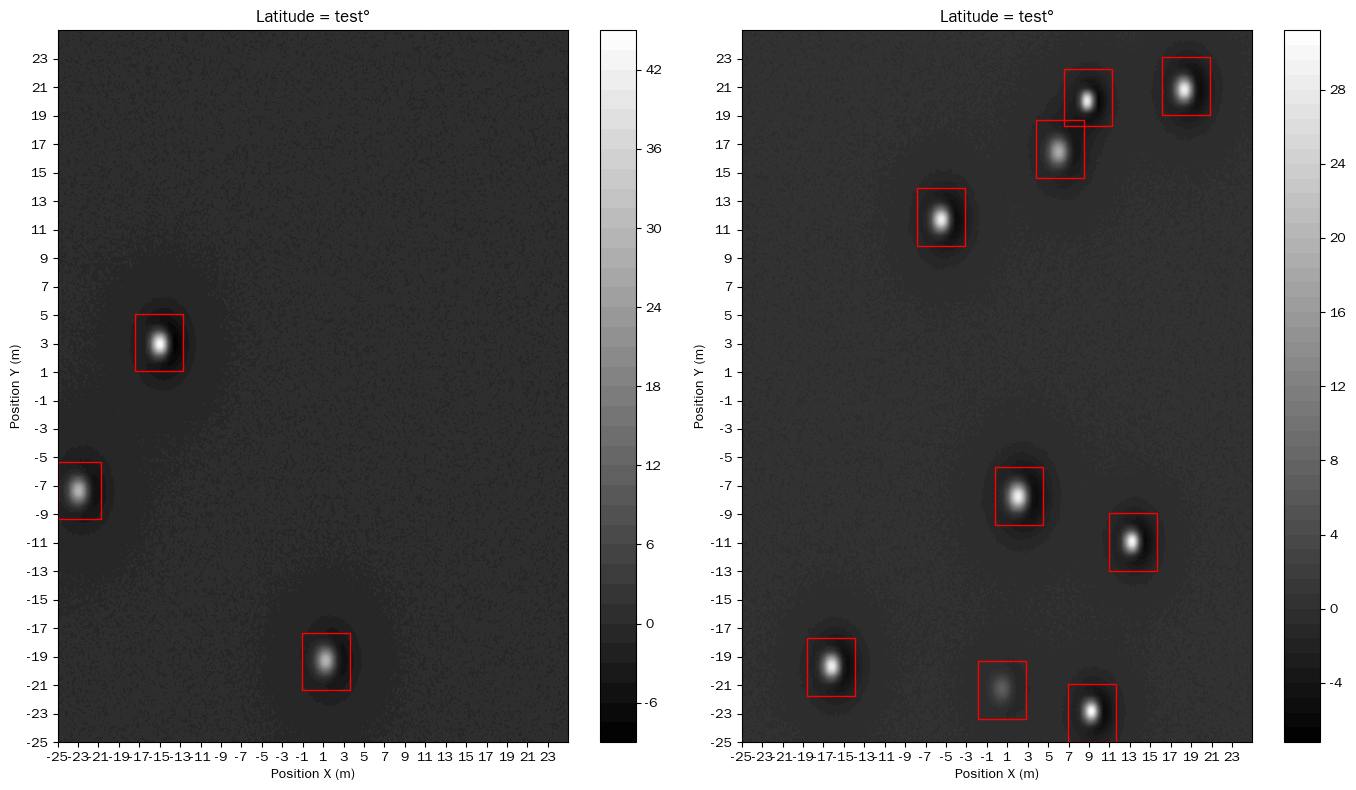

In [15]:
Plot_X_data_with_noise(num_of_dipoles, bbox, data,gass_id)

### 球体与椭球

生成 训练数据集

In [2]:
# Property = [1,0]
Property = [0.3,0.7]
# Property = [0,1]
seed = 54

In [3]:
parameter, num_of_dipoles,kind_of_data, bbox,data,n_of_each = generate_random_muti_mix_data(data_num=100,seed=seed,property=Property,nummax=9)

In [4]:
n_of_each

[131, 318]

In [5]:
map_lenght = 25
zmax = 512

X = np.linspace(-map_lenght, map_lenght, zmax)
Y = np.linspace(-map_lenght, map_lenght, zmax)

In [8]:
data= X_array_reship(data,map_lenght,zmax)
gass_id = add_gaussian_noise(data,n_models_with_noise=500)

In [10]:
save_dir = '/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/data/bishedata_4000_data_500_noise_0.3_0.7'
save_data(save_dir,parameter=parameter, num_of_dipoles=num_of_dipoles,kind_of_data=kind_of_data, bbox=bbox,data=data,gass_id=gass_id,n_of_each=n_of_each)

In [4]:
read_dir = '/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/data/bishedata_4000_data_500_noise_0.3_0.7'
parameter, num_of_dipoles,kind_of_data, bbox,data,gass_id,n_of_each = read_data(read_dir,'parameter', 'num_of_dipoles','kind_of_data', 'bbox','data','gass_id','n_of_each')

In [5]:
parameter.shape

(4000, 9, 9)

In [6]:
root_dir = f'/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/data/bishedata_4000_data_500_noise_0.3_0.7'
convert_to_YOLO_mix(num_of_dipoles, bbox, data,kind_of_data, map_length=25,root_dir=root_dir)


### 生成深度测试
根据原始数据及标注生成训练集与验证集,根据yolo预测结果生成测试集

In [14]:
den_data = cov_to_densenet(parameter, num_of_dipoles, bbox,data)
den_data.shape

AttributeError: 'dict' object has no attribute 'shape'

In [12]:
def plot_densenet_data(den_data, map_lenght=25):
    zmax = den_data.shape[-1]

    xmin = -map_lenght
    xmax = map_lenght
    ymin = -map_lenght
    ymax = map_lenght

    X = np.linspace(xmin, xmax, zmax)
    Y = np.linspace(ymin, ymax, zmax)

    # Adjust the size of your images
    plt.figure(figsize=(15, 7))

    # Iterate and plot random images 迭代 绘制随机图像
    for i in range(6):

        n_p = int(np.random.randint(0, den_data.shape[0], 1))

        plt.subplot(2, 3, i + 1)
        plt.contourf(X, Y, den_data[n_p, 0, :, :], levels=40, cmap='rainbow')
        plt.axis('on')
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        clb = plt.colorbar()
        clb.set_label('磁异常 (nT)',
                      labelpad=15, y=0.5, rotation=270)

    # Adjust subplot parameters to give specified padding
    plt.tight_layout()


TypeError: Input z must be at least a (2, 2) shaped array, but has shape (64, 1)

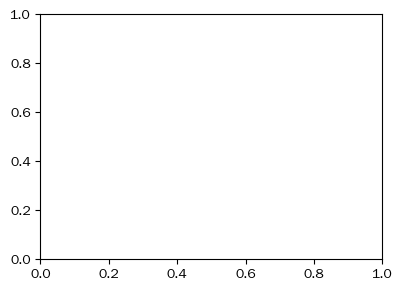

In [13]:
plot_densenet_data(den_data)

In [9]:
data,para = fliter_acdt_type(n_of_each, parameter, num_of_dipoles,den_data, kind_of_data)

In [10]:
dipole_data,ellipse_data = data['0'],data['1']
dipole_para,ellipse_para = para['0'],para['1']

In [11]:
NofD, den_size = dipole_data.shape[:2]
den_data = dipole_data.reshape(NofD, den_size, den_size, 1)
den_data.shape

(5471, 64, 64, 1)